/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_4782/3012342793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='company_id', y='vader_compound',


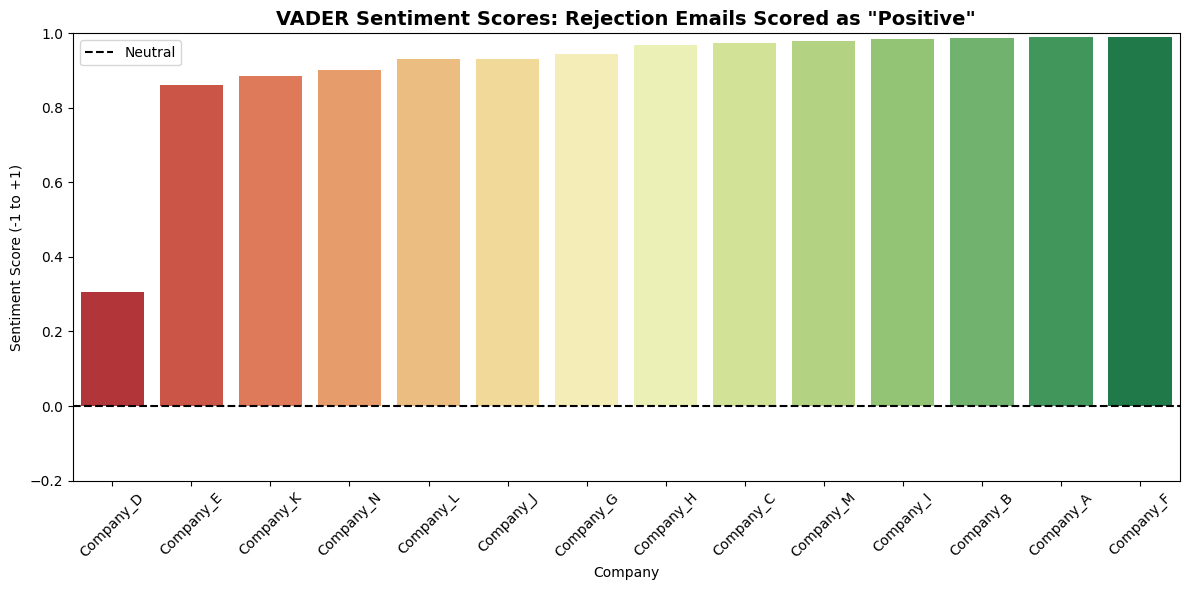

Average sentiment: 0.903
Median sentiment: 0.956
Range: 0.307 to 0.990


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv("../data/rejection_analysis.csv")
df_sorted = df[df['status'] != 'ghosted'].sort_values('vader_compound')


plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='company_id', y='vader_compound', 
            palette='RdYlGn')
plt.axhline(y=0, color='black', linestyle='--', label='Neutral')
plt.title('VADER Sentiment Scores: Rejection Emails Scored as "Positive"', 
          fontsize=14, fontweight='bold')
plt.xlabel('Company')
plt.ylabel('Sentiment Score (-1 to +1)')
plt.xticks(rotation=45)
plt.ylim(-0.2, 1.0)
plt.legend()
plt.tight_layout()
plt.savefig('sentiment_paradox.png', dpi=300)
plt.show()

print(f"Average sentiment: {df_sorted['vader_compound'].mean():.3f}")
print(f"Median sentiment: {df_sorted['vader_compound'].median():.3f}")
print(f"Range: {df_sorted['vader_compound'].min():.3f} to {df_sorted['vader_compound'].max():.3f}")

In [3]:
df_filtered = df[df['status'] != 'ghosted']
numeric_cols = df_filtered.select_dtypes(include='number')
correlation = numeric_cols.corr()
if 'vader_compound' in correlation.columns:
    print("Correlations with sentiment:")
    print(correlation['vader_compound'].sort_values(ascending=False))
else:
    print("No numeric column named 'vader_compound' found.")


Correlations with sentiment:
vader_compound            1.000000
textblob_polarity         0.682687
afinn_positive_count      0.597009
afinn_score               0.587011
empathy_words             0.465626
email_length              0.427056
personal_pronouns         0.414645
word_count                0.407226
sentence_count            0.329241
empathy_density           0.272527
pronoun_density           0.131224
afinn_negative_count      0.100981
flesch_reading           -0.169513
apology_words            -0.386952
days_since_application         NaN
Name: vader_compound, dtype: float64


In [4]:
import re

empathy_keywords = ['thank', 'appreciate', 'grateful', 'hope', 'wish', 'impressed']
print("Empathy word analysis:")
for idx, row in df[df['status'] != 'ghosted'].iterrows():
    words = re.findall(r'\b[a-z]+\b', row['email_text'].lower())
    empathy_found = [w for w in words if w in empathy_keywords]
    if empathy_found:
        print(f"{row['company_id']}: {empathy_found} (count: {len(empathy_found)})")

Empathy word analysis:
Company_A: ['thank', 'appreciate', 'grateful', 'impressed', 'hope'] (count: 5)
Company_B: ['thank'] (count: 1)
Company_C: ['wish'] (count: 1)
Company_E: ['thank', 'appreciate'] (count: 2)
Company_F: ['thank', 'impressed', 'wish', 'hope', 'thank'] (count: 5)
Company_G: ['thank', 'appreciate', 'hope'] (count: 3)
Company_H: ['thank', 'impressed'] (count: 2)
Company_I: ['thank', 'appreciate', 'wish'] (count: 3)
Company_K: ['thank'] (count: 1)
Company_L: ['thank', 'thank', 'wish'] (count: 3)
Company_M: ['thank', 'appreciate'] (count: 2)
Company_N: ['thank', 'wish'] (count: 2)


In [5]:
print("Outlier analysis:")
for company in ['Company_B', 'Company_C']:
    row = df[df['company_id'] == company].iloc[0]
    print(f"\n{company} (Empathy: {row['empathy_words']}, Sentiment: {row['vader_compound']:.3f}):")
    print(f"  Personal pronouns: {row['personal_pronouns']}")
    print(f"  AFINN positive count: {row['afinn_positive_count']}")
    print(f"  Word count: {row['word_count']}")
    print(f"  Apology words: {row['apology_words']}")

Outlier analysis:

Company_B (Empathy: 1, Sentiment: 0.988):
  Personal pronouns: 8
  AFINN positive count: 16
  Word count: 139
  Apology words: 2

Company_C (Empathy: 1, Sentiment: 0.974):
  Personal pronouns: 11
  AFINN positive count: 10
  Word count: 166
  Apology words: 1


In [6]:
print("AFINN Positive Word Rankings:")
print(df[df['status'] != 'ghosted'][['company_id', 'afinn_positive_count', 'vader_compound']].sort_values('afinn_positive_count', ascending=False))

AFINN Positive Word Rankings:
   company_id  afinn_positive_count  vader_compound
5   Company_F                    17          0.9898
0   Company_A                    16          0.9894
1   Company_B                    16          0.9878
8   Company_I                    11          0.9836
2   Company_C                    10          0.9739
12  Company_M                    10          0.9800
7   Company_H                     9          0.9678
13  Company_N                     9          0.9009
11  Company_L                     8          0.9312
6   Company_G                     7          0.9442
9   Company_J                     5          0.9313
4   Company_E                     4          0.8625
10  Company_K                     4          0.8860
3   Company_D                     2          0.3071


In [7]:
# Calculate positive word density
df['positive_density'] = df['afinn_positive_count'] / df['word_count']

print("\nPositive Word Density Analysis:")
print(df[df['status'] != 'ghosted'][['company_id', 'positive_density', 'vader_compound']].sort_values('positive_density', ascending=False))

print(f"\nCorrelation: {df['positive_density'].corr(df['vader_compound']):.3f}")


Positive Word Density Analysis:
   company_id  positive_density  vader_compound
4   Company_E          0.121212          0.8625
11  Company_L          0.115942          0.9312
1   Company_B          0.115108          0.9878
13  Company_N          0.105882          0.9009
7   Company_H          0.104651          0.9678
5   Company_F          0.102410          0.9898
0   Company_A          0.089888          0.9894
12  Company_M          0.085470          0.9800
10  Company_K          0.085106          0.8860
8   Company_I          0.081481          0.9836
6   Company_G          0.064220          0.9442
2   Company_C          0.060241          0.9739
9   Company_J          0.052632          0.9313
3   Company_D          0.027027          0.3071

Correlation: 0.572


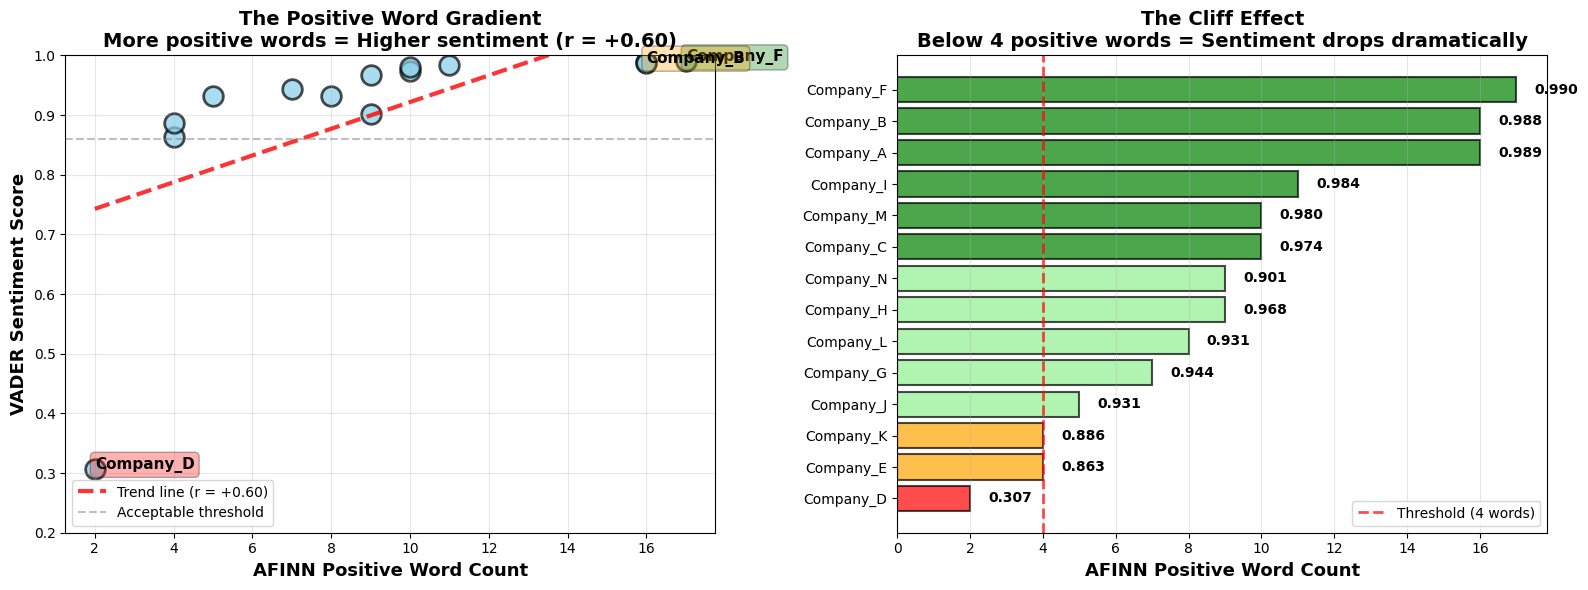


📊 The gradient is clear:
Top tier (15-17 words): 0.987-0.990 sentiment
High tier (9-11 words): 0.901-0.984 sentiment
Mid tier (7-8 words): 0.931-0.944 sentiment
Low tier (4-5 words): 0.863-0.931 sentiment
Danger zone (2 words): 0.307 sentiment ← CLIFF!


In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: AFINN Positive Count vs Sentiment
df_plot = df[df['status'] != 'ghosted'].sort_values('afinn_positive_count')

ax1.scatter(df_plot['afinn_positive_count'], df_plot['vader_compound'], 
           s=200, alpha=0.7, c='skyblue', edgecolors='black', linewidth=2)

# Add trend line
z = np.polyfit(df_plot['afinn_positive_count'], df_plot['vader_compound'], 1)
p = np.poly1d(z)
ax1.plot(df_plot['afinn_positive_count'], p(df_plot['afinn_positive_count']), 
         "r--", linewidth=3, alpha=0.8, label=f'Trend line (r = +0.60)')

# Annotate key points
for company in ['Company_F', 'Company_D', 'Company_B']:
    row = df[df['company_id'] == company].iloc[0]
    color = 'green' if company == 'Company_F' else ('red' if company == 'Company_D' else 'orange')
    ax1.annotate(company, 
                (row['afinn_positive_count'], row['vader_compound']),
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))

ax1.axhline(y=0.86, color='gray', linestyle='--', alpha=0.5, label='Acceptable threshold')
ax1.set_xlabel('AFINN Positive Word Count', fontsize=13, fontweight='bold')
ax1.set_ylabel('VADER Sentiment Score', fontsize=13, fontweight='bold')
ax1.set_title('The Positive Word Gradient\nMore positive words = Higher sentiment (r = +0.60)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)
ax1.set_ylim(0.2, 1.0)

# Right: The Gap Visualization
companies = df_plot['company_id'].values
positive_counts = df_plot['afinn_positive_count'].values
colors = ['red' if c == 2 else 'orange' if c <= 4 else 'lightgreen' if c <= 9 else 'green' 
          for c in positive_counts]

bars = ax2.barh(companies, positive_counts, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add sentiment scores as text
for i, (company, count) in enumerate(zip(companies, positive_counts)):
    sentiment = df[df['company_id'] == company]['vader_compound'].values[0]
    ax2.text(count + 0.5, i, f'{sentiment:.3f}', va='center', fontweight='bold', fontsize=10)

ax2.axvline(x=4, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Threshold (4 words)')
ax2.set_xlabel('AFINN Positive Word Count', fontsize=13, fontweight='bold')
ax2.set_title('The Cliff Effect\nBelow 4 positive words = Sentiment drops dramatically', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/positive_word_gradient.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 The gradient is clear:")
print(f"Top tier (15-17 words): 0.987-0.990 sentiment")
print(f"High tier (9-11 words): 0.901-0.984 sentiment")
print(f"Mid tier (7-8 words): 0.931-0.944 sentiment")
print(f"Low tier (4-5 words): 0.863-0.931 sentiment")
print(f"Danger zone (2 words): 0.307 sentiment ← CLIFF!")

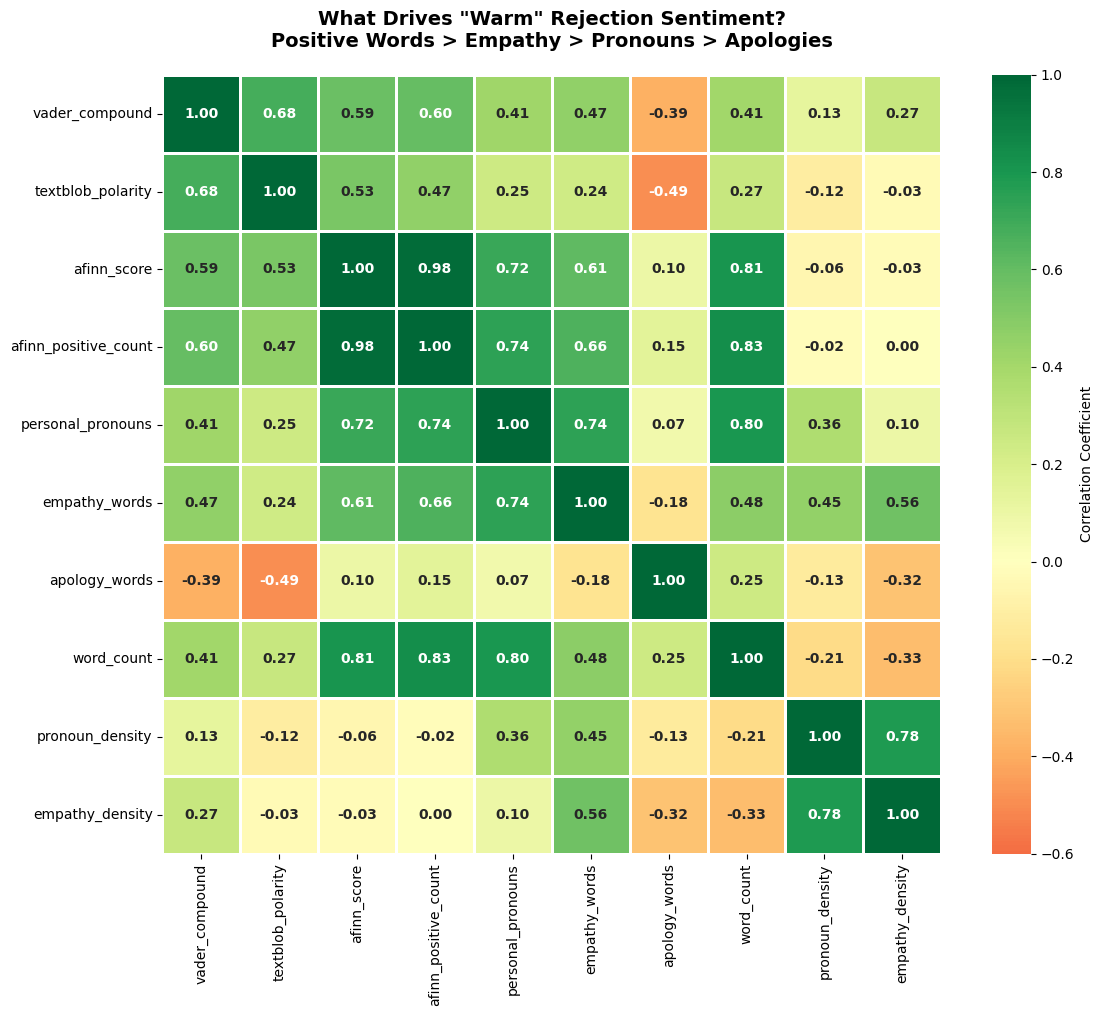


📊 Key Correlations with VADER Sentiment:
textblob_polarity       0.682687
afinn_positive_count    0.597009
afinn_score             0.587011
empathy_words           0.465626
personal_pronouns       0.414645
word_count              0.407226
empathy_density         0.272527
pronoun_density         0.131224
apology_words          -0.386952
Name: vader_compound, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Updated correlation matrix with your new features
correlations = df[df['status'] != 'ghosted'][[
    'vader_compound', 'textblob_polarity',
    'afinn_score', 'afinn_positive_count', 
    'personal_pronouns', 'empathy_words',
    'apology_words', 'word_count', 
    'pronoun_density', 'empathy_density'
]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            vmin=-0.6, vmax=1, square=True, linewidths=2,
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'fontsize': 10, 'fontweight': 'bold'})

plt.title('What Drives "Warm" Rejection Sentiment?\nPositive Words > Empathy > Pronouns > Apologies', 
          fontsize=14, fontweight='bold', pad=20)

ax = plt.gca()
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Key Correlations with VADER Sentiment:")
vader_corr = correlations['vader_compound'].drop('vader_compound').sort_values(ascending=False)
print(vader_corr)

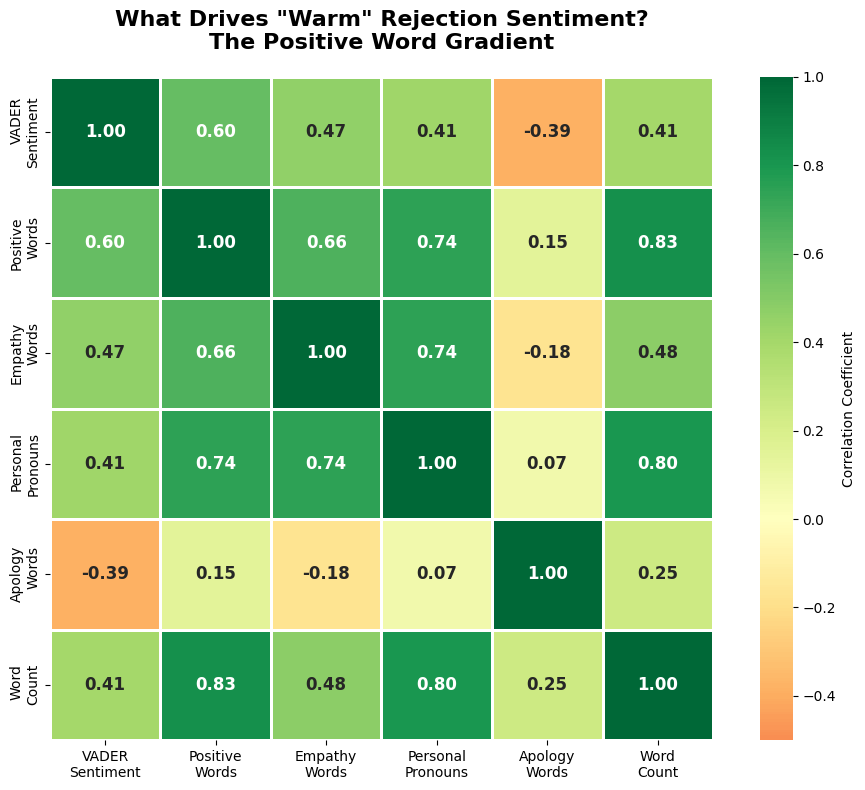

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simplified - only the most important features
key_features = [
    'vader_compound',
    'afinn_positive_count', 
    'empathy_words',
    'personal_pronouns',
    'apology_words',
    'word_count'
]

correlations = df[df['status'] != 'ghosted'][key_features].corr()

# Rename for cleaner display
correlations.index = ['VADER\nSentiment', 'Positive\nWords', 'Empathy\nWords', 
                      'Personal\nPronouns', 'Apology\nWords', 'Word\nCount']
correlations.columns = ['VADER\nSentiment', 'Positive\nWords', 'Empathy\nWords', 
                        'Personal\nPronouns', 'Apology\nWords', 'Word\nCount']

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            vmin=-0.5, vmax=1, square=True, linewidths=2,
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})

plt.title('What Drives "Warm" Rejection Sentiment?\nThe Positive Word Gradient', 
          fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap_clean.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_4782/2401395432.py:78: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_4782/2401395432.py:78: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_4782/2401395432.py:79: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.savefig('../visualizations/three_factor_analysis.png', dpi=300, bbox_inches='tight')
/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_4782/2401395432.py:79: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.savefig('../visualizations/three_factor_analysis.png', dpi=300, bbox_inches='tight')
/Users/chotij/Documents/Coding/job_rejection_analysis/env/lib/python3.12/site-packages/IPython/core/pylabtools

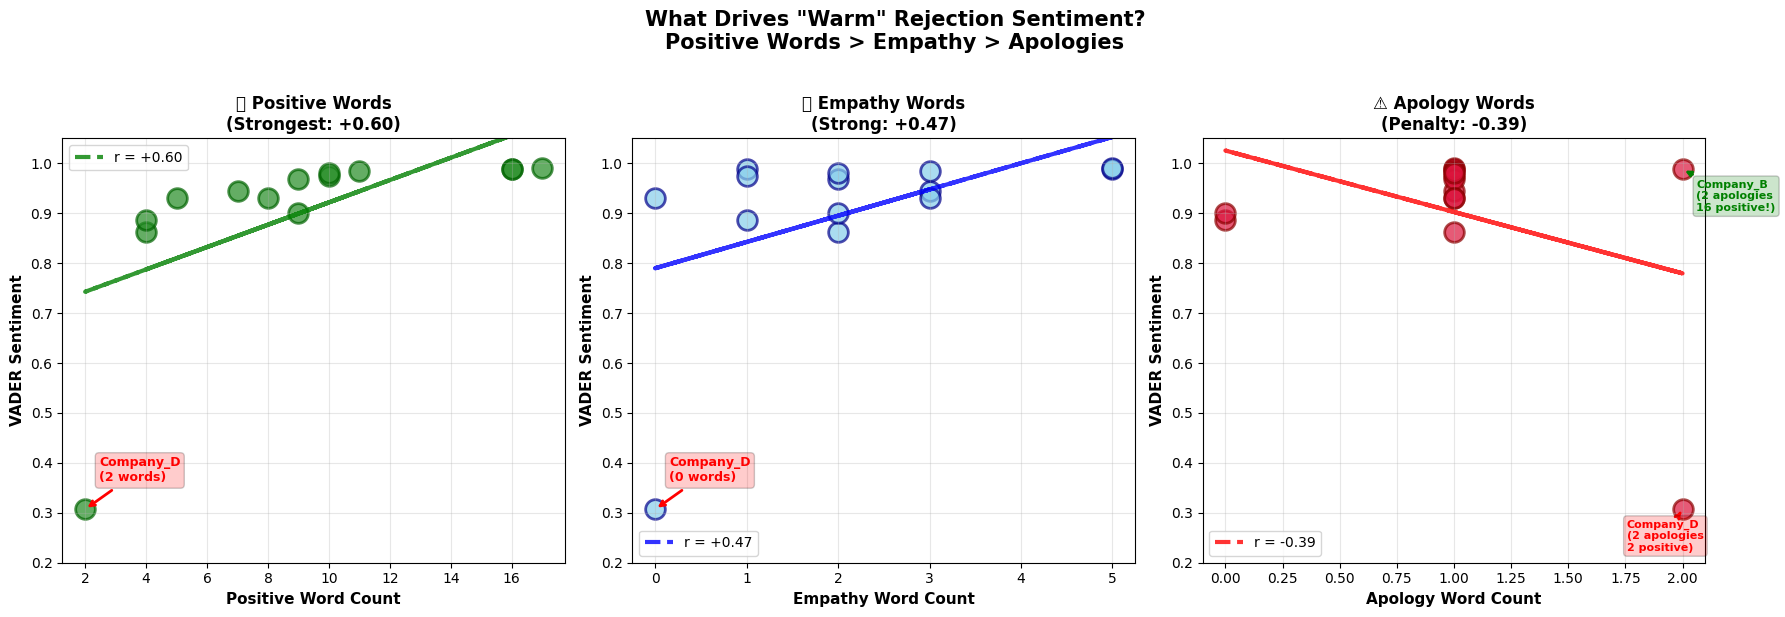


💡 The Complete Picture:
🥇 Positive word count: +0.60 (Strongest)
🥈 Empathy words: +0.47
🥉 Personal pronouns: +0.46
⚠️ Apology words: -0.39 (Penalty - but can be compensated!)

🎯 Key insight: Company_B had 2 apologies like Company_D, but 16 positive words vs 2 = success!


In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

df_plot = df[df['status'] != 'ghosted']

# Panel 1: Positive Words (Strongest)
ax1.scatter(df_plot['afinn_positive_count'], df_plot['vader_compound'], 
            s=200, alpha=0.7, c='forestgreen', edgecolors='darkgreen', linewidth=2)
z1 = np.polyfit(df_plot['afinn_positive_count'], df_plot['vader_compound'], 1)
p1 = np.poly1d(z1)
ax1.plot(df_plot['afinn_positive_count'], p1(df_plot['afinn_positive_count']), 
         "g--", alpha=0.8, linewidth=3, label=f'r = +0.60')
# Annotate Company_D
company_d = df[df['company_id'] == 'Company_D'].iloc[0]
ax1.annotate('Company_D\n(2 words)', 
            (company_d['afinn_positive_count'], company_d['vader_compound']),
            fontsize=9, fontweight='bold', color='red',
            xytext=(10, 20), textcoords='offset points',
            bbox=dict(boxstyle='round', facecolor='red', alpha=0.2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax1.set_xlabel('Positive Word Count', fontsize=11, fontweight='bold')
ax1.set_ylabel('VADER Sentiment', fontsize=11, fontweight='bold')
ax1.set_title('🥇 Positive Words\n(Strongest: +0.60)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0.2, 1.05)  # FULL RANGE!

# Panel 2: Empathy Words
ax2.scatter(df_plot['empathy_words'], df_plot['vader_compound'],
            s=200, alpha=0.7, c='skyblue', edgecolors='darkblue', linewidth=2)
z2 = np.polyfit(df_plot['empathy_words'], df_plot['vader_compound'], 1)
p2 = np.poly1d(z2)
ax2.plot(df_plot['empathy_words'], p2(df_plot['empathy_words']),
         "b--", alpha=0.8, linewidth=3, label=f'r = +0.47')
# Annotate Company_D
ax2.annotate('Company_D\n(0 words)', 
            (company_d['empathy_words'], company_d['vader_compound']),
            fontsize=9, fontweight='bold', color='red',
            xytext=(10, 20), textcoords='offset points',
            bbox=dict(boxstyle='round', facecolor='red', alpha=0.2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax2.set_xlabel('Empathy Word Count', fontsize=11, fontweight='bold')
ax2.set_ylabel('VADER Sentiment', fontsize=11, fontweight='bold')
ax2.set_title('🥈 Empathy Words\n(Strong: +0.47)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.2, 1.05)

# Panel 3: Apology Words (Negative)
ax3.scatter(df_plot['apology_words'], df_plot['vader_compound'],
            s=200, alpha=0.7, c='crimson', edgecolors='darkred', linewidth=2)
z3 = np.polyfit(df_plot['apology_words'], df_plot['vader_compound'], 1)
p3 = np.poly1d(z3)
ax3.plot(df_plot['apology_words'], p3(df_plot['apology_words']),
         "r--", alpha=0.8, linewidth=3, label=f'r = -0.39')
# Annotate Company_D and Company_B
company_b = df[df['company_id'] == 'Company_B'].iloc[0]
ax3.annotate('Company_D\n(2 apologies\n2 positive)', 
            (company_d['apology_words'], company_d['vader_compound']),
            fontsize=8, fontweight='bold', color='red',
            xytext=(-40, -30), textcoords='offset points',
            bbox=dict(boxstyle='round', facecolor='red', alpha=0.2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax3.annotate('Company_B\n(2 apologies\n16 positive!)', 
            (company_b['apology_words'], company_b['vader_compound']),
            fontsize=8, fontweight='bold', color='green',
            xytext=(10, -30), textcoords='offset points',
            bbox=dict(boxstyle='round', facecolor='green', alpha=0.2),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax3.set_xlabel('Apology Word Count', fontsize=11, fontweight='bold')
ax3.set_ylabel('VADER Sentiment', fontsize=11, fontweight='bold')
ax3.set_title('⚠️ Apology Words\n(Penalty: -0.39)', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0.2, 1.05)

plt.suptitle('What Drives "Warm" Rejection Sentiment?\nPositive Words > Empathy > Apologies', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../visualizations/three_factor_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 The Complete Picture:")
print("🥇 Positive word count: +0.60 (Strongest)")
print("🥈 Empathy words: +0.47")
print("🥉 Personal pronouns: +0.46")
print("⚠️ Apology words: -0.39 (Penalty - but can be compensated!)")
print("\n🎯 Key insight: Company_B had 2 apologies like Company_D, but 16 positive words vs 2 = success!")

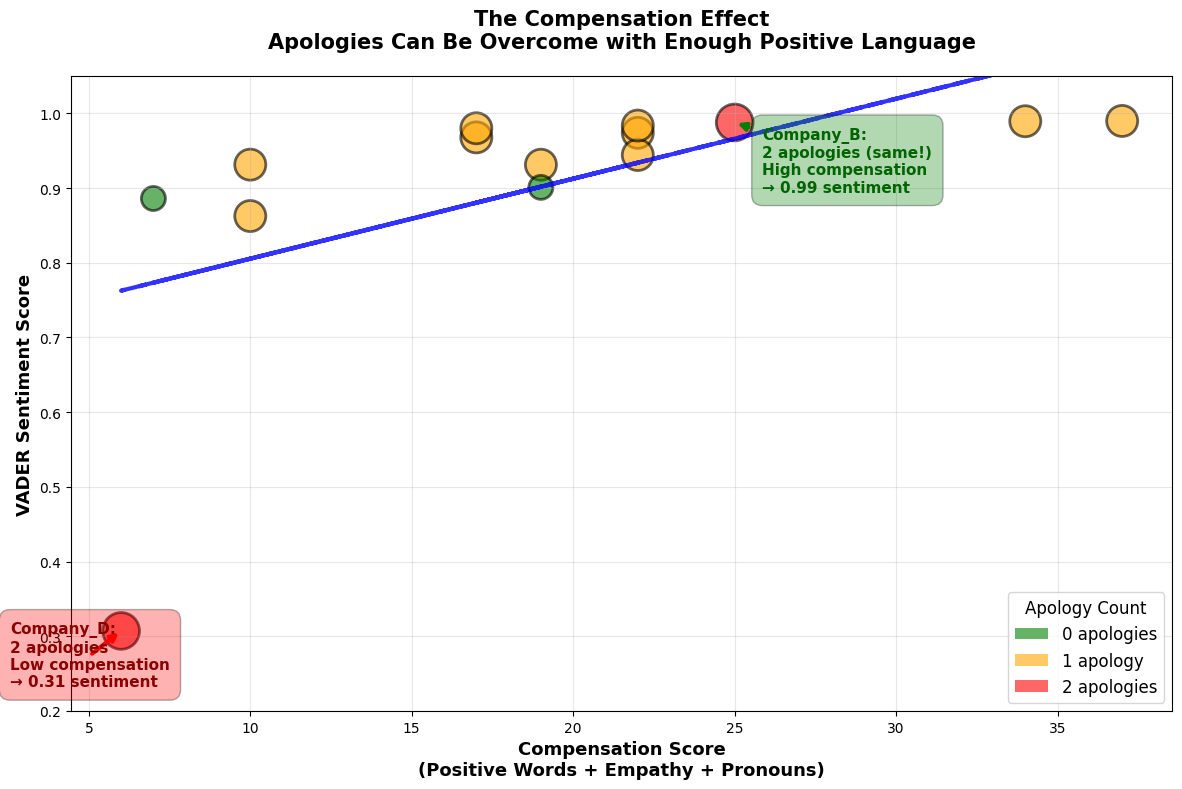


🎯 The Compensation Effect:
Both Company_D and Company_B had 2 apologies.
Company_D: Compensation score = 6 → 0.31 sentiment
Company_B: Compensation score = 25 → 0.99 sentiment

💡 Apologies hurt, but positive language compensates!


In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

df_plot = df[df['status'] != 'ghosted']

# Calculate compensation score
df_plot = df_plot.copy()
df_plot['compensation_score'] = (df_plot['afinn_positive_count'] + 
                                  df_plot['empathy_words'] + 
                                  df_plot['personal_pronouns'])

# Scatter with size based on apologies
sizes = [300 if a == 0 else 500 if a == 1 else 700 for a in df_plot['apology_words']]
colors_map = {0: 'green', 1: 'orange', 2: 'red'}
colors = [colors_map[a] for a in df_plot['apology_words']]

scatter = ax.scatter(df_plot['compensation_score'], df_plot['vader_compound'],
                    s=sizes, alpha=0.6, c=colors, edgecolors='black', linewidth=2)

# Trend line
z = np.polyfit(df_plot['compensation_score'], df_plot['vader_compound'], 1)
p = np.poly1d(z)
correlation = df_plot['compensation_score'].corr(df_plot['vader_compound'])
ax.plot(df_plot['compensation_score'], p(df_plot['compensation_score']), 
        "b--", alpha=0.8, linewidth=3, label=f'r = {correlation:.2f}')

# Annotate the key story
company_d = df[df['company_id'] == 'Company_D'].iloc[0]
company_b = df[df['company_id'] == 'Company_B'].iloc[0]

ax.annotate('Company_D:\n2 apologies\nLow compensation\n→ 0.31 sentiment', 
            (company_d['afinn_positive_count'] + company_d['empathy_words'] + company_d['personal_pronouns'], 
             company_d['vader_compound']),
            fontsize=11, fontweight='bold', color='darkred',
            xytext=(-80, -40), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='red', alpha=0.3),
            arrowprops=dict(arrowstyle='->', color='red', lw=3))

ax.annotate('Company_B:\n2 apologies (same!)\nHigh compensation\n→ 0.99 sentiment', 
            (company_b['afinn_positive_count'] + company_b['empathy_words'] + company_b['personal_pronouns'], 
             company_b['vader_compound']),
            fontsize=11, fontweight='bold', color='darkgreen',
            xytext=(20, -50), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='green', alpha=0.3),
            arrowprops=dict(arrowstyle='->', color='green', lw=3))

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.6, label='0 apologies'),
    Patch(facecolor='orange', alpha=0.6, label='1 apology'),
    Patch(facecolor='red', alpha=0.6, label='2 apologies')
]
ax.legend(handles=legend_elements, fontsize=12, loc='lower right', title='Apology Count', title_fontsize=12)

ax.set_xlabel('Compensation Score\n(Positive Words + Empathy + Pronouns)', fontsize=13, fontweight='bold')
ax.set_ylabel('VADER Sentiment Score', fontsize=13, fontweight='bold')
ax.set_title('The Compensation Effect\nApologies Can Be Overcome with Enough Positive Language', 
             fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)
ax.set_ylim(0.2, 1.05)

plt.tight_layout()
plt.savefig('../visualizations/compensation_effect_final.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🎯 The Compensation Effect:")
print("Both Company_D and Company_B had 2 apologies.")
print("Company_D: Compensation score = 6 → 0.31 sentiment")
print("Company_B: Compensation score = 25 → 0.99 sentiment")
print("\n💡 Apologies hurt, but positive language compensates!")

In [14]:

no_apology_companies = df_plot[df_plot['apology_words'] == 0]

print("\n🟢 THE 'NO APOLOGY' EMAILS:\n")
for idx, row in no_apology_companies.iterrows():
    print(f"{row['company_id']}")
    print(f"  Sentiment: {row['vader_compound']:.3f}")
    print(f"  Length: {row['word_count']} words")
    print(f"  Empathy words: {row['empathy_words']}")
    print(f"  Personal pronouns: {row['personal_pronouns']}")
    print(f"  Preview: {row['email_text'][:150]}...")
    print()


🟢 THE 'NO APOLOGY' EMAILS:

Company_K
  Sentiment: 0.886
  Length: 47 words
  Empathy words: 1
  Personal pronouns: 2
  Preview: Hi [Name], Thank you for your interest in our vacancy. However, all the spots of this vacancy are already filled, so we're not looking for new candida...

Company_N
  Sentiment: 0.901
  Length: 85 words
  Empathy words: 2
  Personal pronouns: 8
  Preview: Dear [Candidate], thank you for your application. We are providing some feedback as part of our learning-focused process. After reviewing your CV and ...



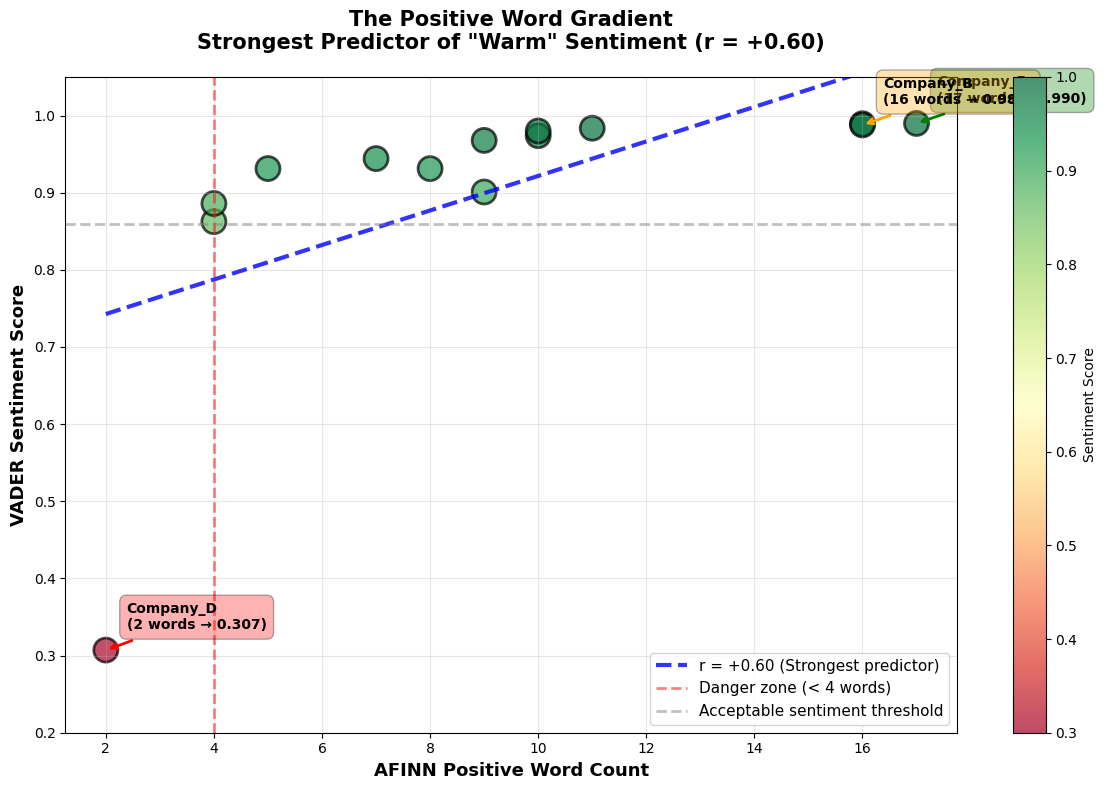


💡 The Key Finding:
✅ Positive word count: +0.60 (Strongest predictor)
✅ Empathy words: +0.47
✅ Personal pronouns: +0.46
❌ Apology words: -0.39

🎯 The cliff effect: Below 4 positive words = sentiment drops to 0.31


In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

df_plot = df[df['status'] != 'ghosted'].sort_values('afinn_positive_count')

# Scatter plot with gradient color
scatter = ax.scatter(df_plot['afinn_positive_count'], df_plot['vader_compound'], 
                    s=300, alpha=0.7, c=df_plot['vader_compound'], 
                    cmap='RdYlGn', edgecolors='black', linewidth=2,
                    vmin=0.3, vmax=1.0)

# Trend line
z = np.polyfit(df_plot['afinn_positive_count'], df_plot['vader_compound'], 1)
p = np.poly1d(z)
ax.plot(df_plot['afinn_positive_count'], p(df_plot['afinn_positive_count']), 
        "b--", alpha=0.8, linewidth=3, label=f'r = +0.60 (Strongest predictor)')

# Annotate key points
for company in ['Company_F', 'Company_D', 'Company_B']:
    row = df[df['company_id'] == company].iloc[0]
    color = 'green' if company == 'Company_F' else ('red' if company == 'Company_D' else 'orange')
    ax.annotate(f"{company}\n({row['afinn_positive_count']} words → {row['vader_compound']:.3f})", 
                (row['afinn_positive_count'], row['vader_compound']),
                fontsize=10, fontweight='bold',
                xytext=(15, 15), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.3),
                arrowprops=dict(arrowstyle='->', lw=2, color=color))

# Threshold line
ax.axvline(x=4, color='red', linestyle='--', linewidth=2, alpha=0.5, 
           label='Danger zone (< 4 words)')
ax.axhline(y=0.86, color='gray', linestyle='--', linewidth=2, alpha=0.5,
           label='Acceptable sentiment threshold')

ax.set_xlabel('AFINN Positive Word Count', fontsize=13, fontweight='bold')
ax.set_ylabel('VADER Sentiment Score', fontsize=13, fontweight='bold')
ax.set_title('The Positive Word Gradient\n' + 
             'Strongest Predictor of "Warm" Sentiment (r = +0.60)', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3)
ax.set_ylim(0.2, 1.05)  # SHOW THE FULL RANGE including Company_D!

plt.colorbar(scatter, ax=ax, label='Sentiment Score')
plt.tight_layout()
plt.savefig('../visualizations/positive_word_gradient.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 The Key Finding:")
print("✅ Positive word count: +0.60 (Strongest predictor)")
print("✅ Empathy words: +0.47")
print("✅ Personal pronouns: +0.46")
print("❌ Apology words: -0.39")
print("\n🎯 The cliff effect: Below 4 positive words = sentiment drops to 0.31")

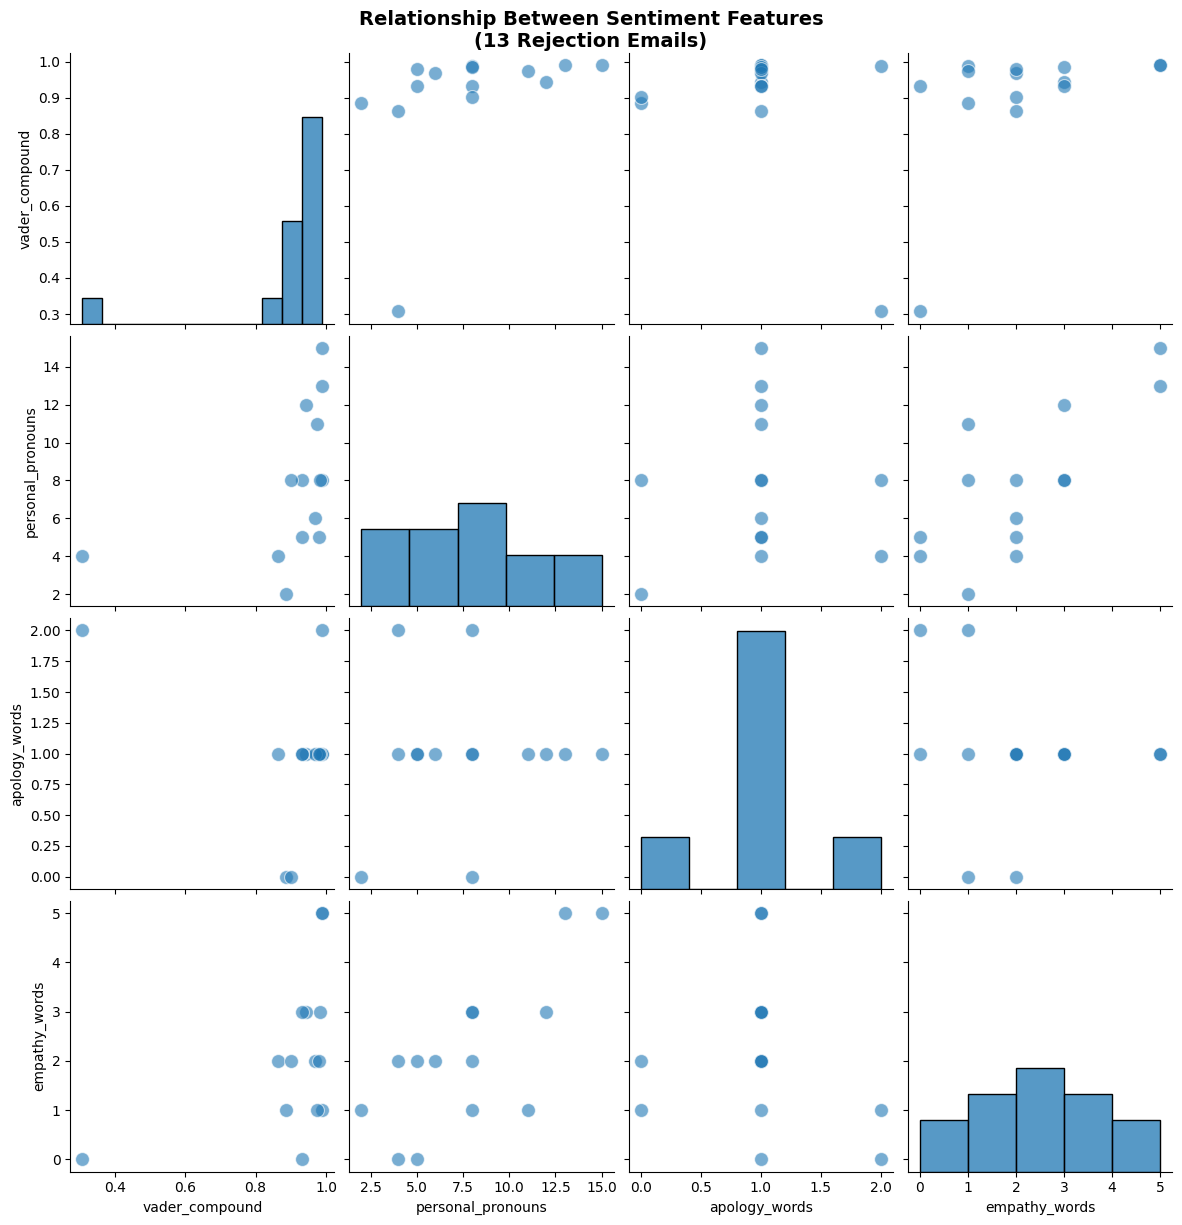

In [16]:
import seaborn as sns

plot_vars = ['vader_compound', 'personal_pronouns', 'apology_words', 'empathy_words']
plot_df = df[df['status'] != 'ghosted'][plot_vars]

g = sns.pairplot(plot_df, diag_kind='hist', plot_kws={'alpha': 0.6, 's': 100},
                 height=3, aspect=1)
g.fig.suptitle('Relationship Between Sentiment Features\n(13 Rejection Emails)', 
               fontsize=14, fontweight='bold', y=1.02)
plt.savefig('pairplot_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

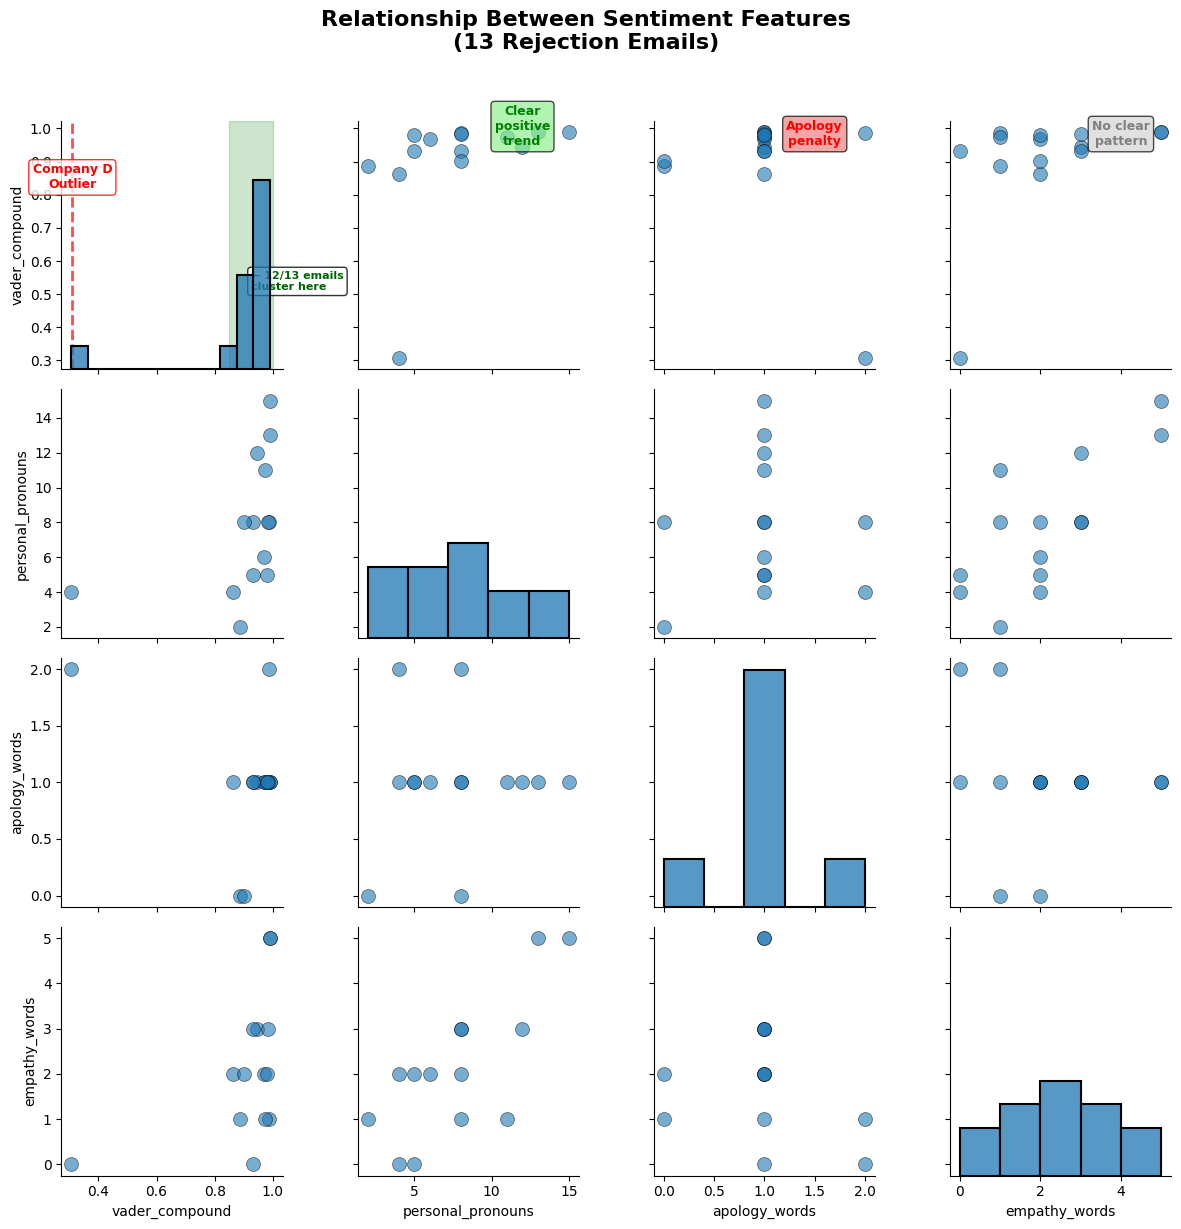

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Create the pairplot
plot_vars = ['vader_compound', 'personal_pronouns', 'apology_words', 'empathy_words']
plot_df = df[df['status'] != 'ghosted'][plot_vars]

g = sns.pairplot(plot_df, diag_kind='hist', 
                 plot_kws={'alpha': 0.6, 's': 100, 'edgecolor': 'black', 'linewidth': 0.5},
                 diag_kws={'edgecolor': 'black', 'linewidth': 1.5},
                 height=3, aspect=1, corner=False)

# Add title
g.fig.suptitle('Relationship Between Sentiment Features\n(13 Rejection Emails)', 
               fontsize=16, fontweight='bold', y=1.02)

# Annotate key findings
# 1. Highlight the outlier in VADER distribution
axes = g.axes
axes[0, 0].axvline(x=0.31, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[0, 0].text(0.31, axes[0, 0].get_ylim()[1] * 0.8, 'Company D\nOutlier', 
                fontsize=9, color='red', fontweight='bold', ha='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='red', alpha=0.8))

# 2. Annotate the positive trend (VADER vs pronouns)
axes[0, 1].text(12, 0.95, 'Clear\npositive\ntrend', fontsize=9, color='green',
                fontweight='bold', ha='center',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# 3. Annotate the negative trend (VADER vs apologies)
axes[0, 2].text(1.5, 0.95, 'Apology\npenalty', fontsize=9, color='red',
                fontweight='bold', ha='center',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# 4. Annotate the scatter (VADER vs empathy)
axes[0, 3].text(4, 0.95, 'No clear\npattern', fontsize=9, color='gray',
                fontweight='bold', ha='center',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.7))

# 5. Highlight the distribution cluster
axes[0, 0].axvspan(0.85, 1.0, alpha=0.2, color='green')
axes[0, 0].text(0.925, axes[0, 0].get_ylim()[1] * 0.5, '← 12/13 emails\ncluster here', 
                fontsize=8, color='darkgreen', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('pairplot_annotated.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
top_companies = df[df['status'] != 'ghosted'].nlargest(5, 'vader_compound')
bottom_companies = df[df['status'] != 'ghosted'].nsmallest(3, 'vader_compound')

print("TOP 5 HIGHEST SENTIMENT:")
print(top_companies[['company_id', 'vader_compound', 'email_length', 'personal_pronouns', 'apology_words']])

print("\nBOTTOM 3 LOWEST SENTIMENT:")
print(bottom_companies[['company_id', 'vader_compound', 'email_length', 'personal_pronouns', 'apology_words']])

TOP 5 HIGHEST SENTIMENT:
   company_id  vader_compound  email_length  personal_pronouns  apology_words
5   Company_F          0.9898           945                 15              1
0   Company_A          0.9894          1023                 13              1
1   Company_B          0.9878           834                  8              2
8   Company_I          0.9836           786                  8              1
12  Company_M          0.9800           723                  5              1

BOTTOM 3 LOWEST SENTIMENT:
   company_id  vader_compound  email_length  personal_pronouns  apology_words
3   Company_D          0.3071           422                  4              2
4   Company_E          0.8625           222                  4              1
10  Company_K          0.8860           265                  2              0
